In [169]:
from sklearn.linear_model import BayesianRidge, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.neighbors import LocalOutlierFactor

from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error as mse

import pickle
import numpy as np
import pandas as pd
import random as r
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

r.seed(1)

import warnings
warnings.filterwarnings("ignore")

### EDA

In [170]:
dfx = pd.read_csv("train_features.csv")
dfy = pd.read_csv("train_targets.csv")

In [171]:
df_test = pd.read_csv("test_features.csv")

In [172]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       900 non-null    int64  
 1   sex       900 non-null    object 
 2   bmi       900 non-null    float64
 3   children  900 non-null    int64  
 4   smoker    900 non-null    object 
 5   region    900 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 42.3+ KB


In [173]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  900 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [174]:
df = dfx.join(dfy["charges"])

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       900 non-null    int64  
 1   sex       900 non-null    object 
 2   bmi       900 non-null    float64
 3   children  900 non-null    int64  
 4   smoker    900 non-null    object 
 5   region    900 non-null    object 
 6   charges   900 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 49.3+ KB


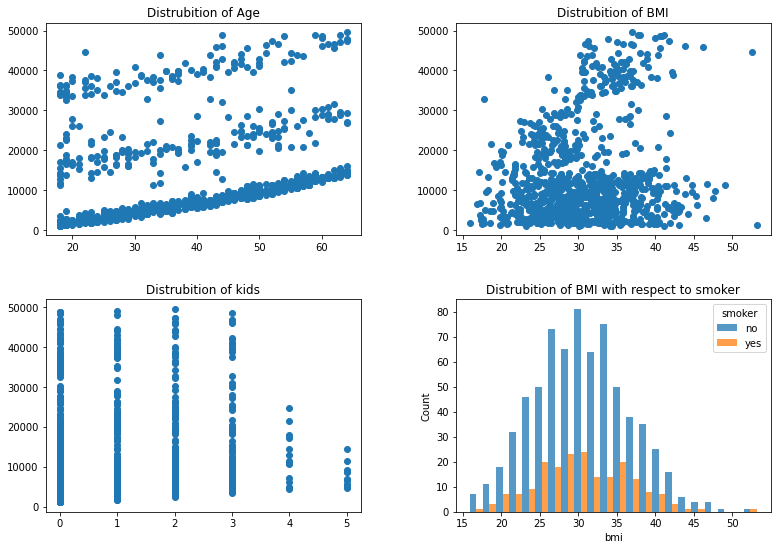

In [221]:
fig = plt.figure(figsize=(13,9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = fig.add_subplot(221)
ax.set_title("Distrubition of Age")
ax.scatter(df["age"],df["charges"])

ax = fig.add_subplot(222)
ax.set_title("Distrubition of BMI")
ax.scatter(df["bmi"], df["charges"])

ax = fig.add_subplot(223)
ax.set_title("Distrubition of kids")
ax.scatter(df["children"],df["charges"])

ax = fig.add_subplot(224)
ax.set_title("Distrubition of BMI with respect to smoker")
sns.histplot(data=df, x='bmi', hue='smoker', stat='count', edgecolor=None,multiple="dodge",)
plt.show()

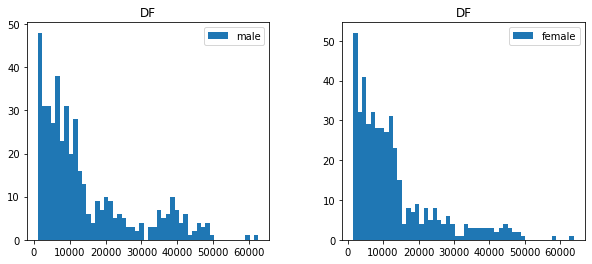

In [177]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = fig.add_subplot(121)
ax.hist(df[df["sex"]=="male"]["charges"], alpha=1, label="male" ,bins=50)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(122)
ax.hist(df[df["sex"]=="female"]["charges"], alpha=1, label="female" ,bins=50)
ax.set_title("DF")
ax.legend()

plt.show()

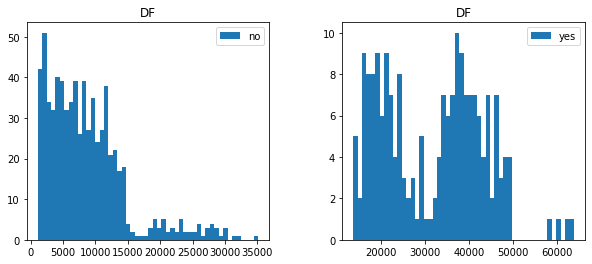

In [178]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = fig.add_subplot(121)
ax.hist(df[df["smoker"]=="no"]["charges"], alpha=1, label="no" ,bins=50)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(122)
ax.hist(df[df["smoker"]=="yes"]["charges"], alpha=1, label="yes" ,bins=50)
ax.set_title("DF")
ax.legend()

plt.show()

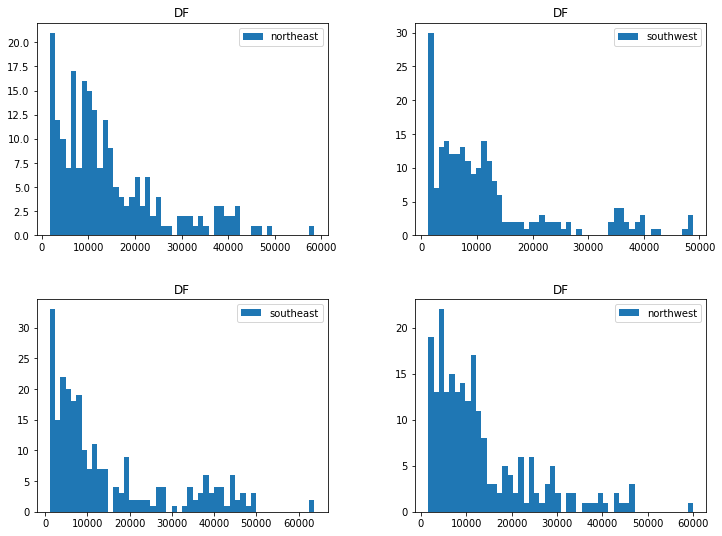

In [179]:
fig = plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = fig.add_subplot(221)
ax.hist(df[df["region"]=="northeast"]["charges"], alpha=1, label="northeast" ,bins=50)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(222)
ax.hist(df[df["region"]=="southwest"]["charges"], alpha=1, label="southwest" ,bins=50)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(223)
ax.hist(df[df["region"]=="southeast"]["charges"], alpha=1, label="southeast" ,bins=50)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(224)
ax.hist(df[df["region"]=="northwest"]["charges"], alpha=1, label="northwest" ,bins=50)
ax.set_title("DF")
ax.legend()

plt.show()

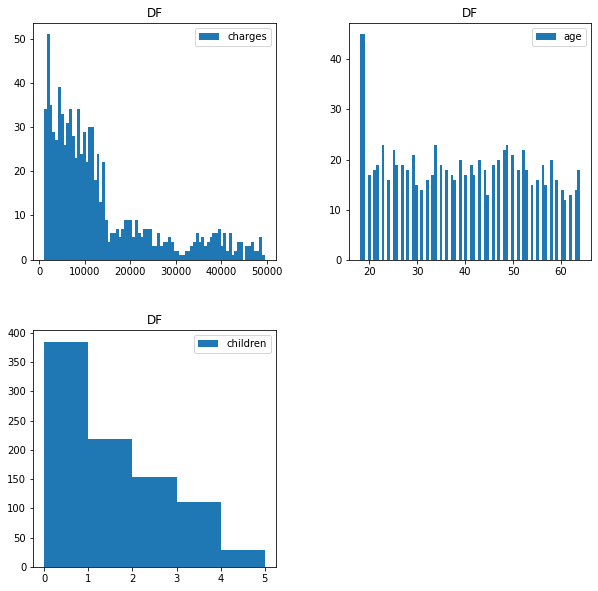

In [209]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = fig.add_subplot(221)
ax.hist(df["charges"], alpha=1, label="charges" ,bins=80)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(222)
ax.hist(df["age"], alpha=1, label="age" ,bins=80)
ax.set_title("DF")
ax.legend()

ax = fig.add_subplot(223)
ax.hist(df["children"], alpha=1, label="children" ,bins=5)
ax.set_title("DF")
ax.legend()

plt.show()

### feature edit

In [181]:
df = df[df["charges"]<51000]

In [182]:
df.loc[df['bmi'] > 35, 'weight'] = "extraweight"
df.loc[df['bmi'] <= 35, 'weight'] = "overweight"
df.loc[df['bmi'] < 30, 'weight'] = "fat"
df.loc[df['bmi'] < 25, 'weight'] = "ideal"
df.loc[df['bmi'] < 18.5, 'weight'] = "weak"

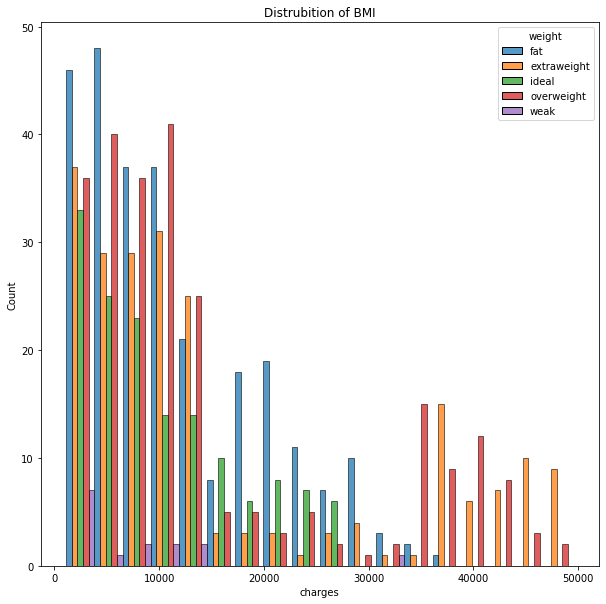

In [213]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = fig.add_subplot(111)
ax.set_title("Distrubition of BMI")
sns.histplot(data=df, x='charges', hue='weight', multiple="dodge", stat='count')
plt.show()

In [184]:
df_dummies = pd.get_dummies(df,drop_first=True)

In [185]:
df_dummies.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,weight_fat,weight_ideal,weight_overweight,weight_weak
age,1.000000,0.114986,0.027333,0.274750,-0.028237,-0.034283,0.038580,-0.045686,-0.010852,-0.007003,-0.104052,0.029155,-0.063592
bmi,0.114986,1.000000,-0.013741,0.177320,0.069840,-0.012199,-0.155033,0.287595,0.018930,-0.326233,-0.586591,0.179002,-0.281415
children,0.027333,-0.013741,1.000000,0.046035,0.036567,-0.023343,0.073594,-0.054534,0.011013,0.001162,0.025396,0.041791,-0.039060
charges,0.274750,0.177320,0.046035,1.000000,0.056017,0.787056,-0.019376,0.058649,-0.065580,-0.098356,-0.118700,0.080035,-0.063646
sex_male,-0.028237,0.069840,0.036567,0.056017,1.000000,0.057717,-0.061119,0.034130,0.019379,-0.059003,-0.033310,0.039004,-0.025224
smoker_yes,-0.034283,-0.012199,-0.023343,0.787056,0.057717,1.000000,-0.034160,0.071262,-0.054358,0.005760,0.010187,-0.012865,-0.026354
region_northwest,0.038580,-0.155033,0.073594,-0.019376,-0.061119,-0.034160,1.000000,-0.349896,-0.324463,0.076548,0.037374,0.005183,0.067482
region_southeast,-0.045686,0.287595,-0.054534,0.058649,0.034130,0.071262,-0.349896,1.000000,-0.350953,-0.068712,-0.122459,-0.059316,-0.080273
region_southwest,-0.010852,0.018930,0.011013,-0.065580,0.019379,-0.054358,-0.324463,-0.350953,1.000000,-0.015878,-0.034041,0.067158,-0.034016
weight_fat,-0.007003,-0.326233,0.001162,-0.098356,-0.059003,0.005760,0.076548,-0.068712,-0.015878,1.000000,-0.288226,-0.406388,-0.085240


In [186]:
df_dummies = df_dummies.drop_duplicates()

In [187]:
y = df_dummies[["charges"]]
x = df_dummies[["age","smoker_yes","weight_fat","weight_ideal","weight_overweight","weight_weak"]]

In [188]:
df_test.loc[df_test['bmi'] > 35, 'weight'] = "extraweight"
df_test.loc[df_test['bmi'] <= 35, 'weight'] = "overweight"
df_test.loc[df_test['bmi'] < 30, 'weight'] = "fat"
df_test.loc[df_test['bmi'] < 25, 'weight'] = "ideal"
df_test.loc[df_test['bmi'] < 18.5, 'weight'] = "weak"

In [189]:
df_test_dummies = pd.get_dummies(df_test,drop_first=True) 

In [190]:
x_test = df_test_dummies[["age","smoker_yes","weight_fat","weight_ideal","weight_overweight","weight_weak"]]

### Results

In [198]:
# import xgboost for learning model
class Regression:
    def __init__(self):
        # Defining Regressors. All parameters are default.
        self.models = [BayesianRidge(), Ridge(), Lasso(),DecisionTreeRegressor(criterion="mse"),GaussianProcessRegressor(optimizer=mse)]
        
    def loadData(self,X_train_path, y_train_path, x_test_path):
        #self.X_train = pd.read_csv(X_train_path)
        #self.y_train = pd.read_csv(y_train_path)
        #self.X_test = pd.read_csv(x_test_path)
        self.X_train = X_train_path
        self.y_train = y_train_path
        self.X_test = x_test_path

        # Determining outliers in the data set by applying LocalOutlierFactor on the data
    def preprocessData(self):
          clf = LocalOutlierFactor(n_neighbors=50)
          outX_train, outy_train = clf.fit_predict(self.X_train), clf.fit_predict(self.y_train)
          self.X_train = np.delete(np.asarray(self.X_train),np.argwhere(outX_train + outy_train != 2),axis=0)
          self.y_train = np.delete(np.asarray(self.y_train),np.argwhere(outX_train + outy_train != 2),axis=0)
        
        # Fit method
    def fit(self):
        for model in self.models:
            print("STARTING ...")
            print("MODEL:" + str(model))
            model.fit(self.X_train,self.y_train)
            print("FINISHED!")
    
    def saveModel(self,out_name):
        pickle.dump(self.models, open(out_name, 'wb'))
        
    def loadModel(self,model_name):
        self.models = pickle.load(open(model_name, 'rb'))
        
        # Writing test predictions to csv
    def outCsv(self,out_file_name, selected_model = 0):
        predicted = self.models[selected_model].predict(self.X_test)  #direct output
        meltedDF = pd.DataFrame(predicted).to_numpy().flatten()
        ID_column = []
        for i in range(meltedDF.shape[0]):
            ID_column.append(i) 
        ID_column_frame = pd.DataFrame(ID_column, columns = ['ID'] )
        predicted_frame = pd.DataFrame(meltedDF, columns = ['Predicted'])
        pd.concat([ID_column_frame,predicted_frame],axis=1).to_csv(out_file_name,index=False)


In [199]:
class crossValidation:
    def __init__(self,model):
        self.model = model
        self.kf = KFold(n_splits=5, shuffle=True, random_state=1)
        self.mse = []

    def loadData(self,X_train_path, y_train_path, x_test_path):
        #self.X_train = pd.read_csv(X_train_path)
        #self.y_train = pd.read_csv(y_train_path)
        #self.X_test = pd.read_csv(x_test_path)
        self.X_train = X_train_path
        self.y_train = y_train_path
        self.X_test = x_test_path 
    
        # PCA method for data Preprocessing
    def PCA(self,n_components):
        self.transformer = PCA(n_components=n_components) #n_components = min(num of samples, num of features)
        self.transformer.fit(self.X_test)
        return self.transformer.transform(self.X_train),self.transformer.transform(self.X_test)       
        
        # 5 fold cv
    def cv5(self,X,y):
        X = X.values
        y = y.values
        for train_index,test_index in self.kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            X_train_, X_test_ = self.PCA(3)

            reg = self.model
            reg.fit( X_train,y_train)

            predictions = reg.predict(X_test)
            self.mse.append(mse(predictions,y_test))

        print(str(model),": Mean MSE Score:", np.average(self.mse))


In [200]:
Regressor = Regression()
Regressor.loadData(x,y,x_test)
Regressor.preprocessData()

# Training Model
Regressor.fit()
#Regressor.saveModel('BayesianRidge_regressor.pkl')
    
# Loading Model
#Regressor.loadModel('BayesianRidge_regressor.pkl')

# Write predictions
Regressor.outCsv("test.csv", 3)

for model in Regressor.models:
    cv = crossValidation(model)
    cv.loadData(x,y,x_test)
    cv.cv5(x,y)



STARTING ...
MODEL:BayesianRidge()
FINISHED!
STARTING ...
MODEL:Ridge()
FINISHED!
STARTING ...
MODEL:Lasso()
FINISHED!
STARTING ...
MODEL:DecisionTreeRegressor(criterion='mse')
FINISHED!
STARTING ...
MODEL:GaussianProcessRegressor(optimizer=<function mean_squared_error at 0x7f27c0eaa160>)
FINISHED!
BayesianRidge() : Mean MSE Score: 36946351.67540533
Ridge() : Mean MSE Score: 36944032.934621036
Lasso() : Mean MSE Score: 36950628.87140314
DecisionTreeRegressor(criterion='mse') : Mean MSE Score: 30035950.53737269
GaussianProcessRegressor(optimizer=<function mean_squared_error at 0x7f27c0eaa160>) : Mean MSE Score: 33433960.256230514
